In [ ]:
!pip install sklearn
!pip install quantulum3
!pip install transformers==3.5.0
!pip install nltk

In [ ]:
import os
import io
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel, BertForPreTraining
import nltk
from sklearn.model_selection import train_test_split
import re
import ast 
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/MeasEval-main/data/train/train/text

/content/drive/My Drive/MeasEval-main/data/train/train/text


In [ ]:
files=os.listdir()

In [ ]:
cd ..

/content/drive/My Drive/MeasEval-main/data/train/train


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels, tokenizer):

    
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)
    # print(len(tokenized_sentence))
    # print(len(labels))
    return tokenized_sentence, labels

In [ ]:
l=0
NERdata=[]
for i in files:
  
  pathtxt=os.path.join('text',i)
  
  with open(pathtxt, 'r') as f:
    text=f.read()
  pathtsv=os.path.join('tsv',i[:-3]+'tsv')
  if(not(os.path.exists(pathtsv))):
    continue
  filetsv=pd.read_csv(pathtsv,sep = '\t')
  entity=filetsv[['annotType','startOffset','endOffset','text','other']]
  entity=entity[entity['annotType']=='Quantity']
  
  entity = entity.to_numpy().tolist()

  ent=0
  offset=0
  sent_text = nltk.sent_tokenize(text)
  
  for j in sent_text:
    row=[]
    # row.append(i[:-4])
    
    
    ent_sen=[]
    ret = [(m.group(0), m.start(), m.end() - 1) for m in re.finditer(r'\S+', j)]
    start=[]
    
    for word in ret:
      types=[]
      # other=[]
      for ent_doc in entity:
        
        if(offset+word[1]>=ent_doc[1] and offset+word[2]<=ent_doc[2]):
          dictio={}
          if(not pd.isnull(ent_doc[4])):
            dictio=ast.literal_eval(ent_doc[4])

          
          if('mods' in dictio):
            info=dictio['mods']
            for i in info:
              types.append(i)
            
              
            
            

        
        
      ent_sen.append(types)     
    
    # print(ent_sen)
    sen,label=tokenize_and_preserve_labels(j.split(' '),ent_sen,tokenizer)
    label.insert(0,[])
    label.append([])
    offset+=(1+len(j))
    row.append(j)
    row.append(label)
    
    NERdata.append(row)

In [ ]:
NERdf=pd.DataFrame (NERdata, columns = ['Text','Entity'])

In [ ]:
NERdf.head()

,Text,Entity
0,"We constructed Framingham CVD, CHD, and stroke...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,"Crude, age- and sex-adjusted, and multivariabl...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,"In the analysis of GHQ symptoms, the sample wa...","[[], [], [], [], [], [], [], [], [], [], [], [..."
3,For depressive symptoms defined by CES-D and a...,"[[], [], [], [], [], [], [], [], [], [], [], [..."
4,The situation for the 45° case is more interes...,"[[], [], [], [], [], [], [], [], [], [], [], [..."


In [ ]:
s = {}
temp = NERdf["Entity"].values
for i in temp:
  for j in i:
    if(len(j)>0):
      s[j[0]] = 1

In [ ]:
s

{'HasTolerance': 1,
 'IsApproximate': 1,
 'IsCount': 1,
 'IsList': 1,
 'IsMean': 1,
 'IsMeanHasSD': 1,
 'IsMeanHasTolerance': 1,
 'IsMeanIsRange': 1,
 'IsMedian': 1,
 'IsRange': 1,
 'IsRangeHasTolerance': 1}

In [ ]:
cd /content/drive/My Drive/MeasEval-main/data/train/dev/text

/content/drive/My Drive/MeasEval-main/data/train/dev/text


In [ ]:
files_val=os.listdir()

In [ ]:
cd /content/drive/My Drive/MeasEval-main/data/train/dev

/content/drive/My Drive/MeasEval-main/data/train/dev


In [ ]:
l=0
NERdata_val=[]
for i in files_val:
  
  pathtxt=os.path.join('text',i)
  
  with open(pathtxt, 'r') as f:
    text=f.read()
  pathtsv=os.path.join('tsv',i[:-3]+'tsv')
  if(not(os.path.exists(pathtsv))):
    continue
  filetsv=pd.read_csv(pathtsv,sep = '\t')
  entity=filetsv[['annotType','startOffset','endOffset','text','other']]
  entity=entity[entity['annotType']=='Quantity']
  
  entity = entity.to_numpy().tolist()

  ent=0
  offset=0
  sent_text = nltk.sent_tokenize(text)
  
  for j in sent_text:
    row=[]
    # row.append(i[:-4])
    
    
    ent_sen=[]
    ret = [(m.group(0), m.start(), m.end() - 1) for m in re.finditer(r'\S+', j)]
    start=[]
    
    for word in ret:
      types=[]
      # other=[]
      for ent_doc in entity:
        
        if(offset+word[1]>=ent_doc[1] and offset+word[2]<=ent_doc[2]):
          dictio={}
          if(not pd.isnull(ent_doc[4])):
            dictio=ast.literal_eval(ent_doc[4])

          
          if('mods' in dictio):
            info=dictio['mods']
            for i in info:
              types.append(i)
            
              
            
            

        
        
      ent_sen.append(types)     
    
    # print(ent_sen)
    sen,label=tokenize_and_preserve_labels(j.split(' '),ent_sen,tokenizer)
    label.insert(0,[])
    label.append([])
    offset+=(1+len(j))
    row.append(j)
    row.append(label)
    
    NERdata_val.append(row)

In [ ]:
print(len(NERdata))
print(len(NERdata_val))

1370
199


In [ ]:
NERdf=pd.DataFrame (NERdata, columns = ['Text','Entity'])
NERdf_val=pd.DataFrame (NERdata_val, columns = ['Text','Entity'])

In [ ]:
def len_text(x):
  sum = 0
  for en in x:
    sum += len(en)
  return sum

In [ ]:
NERdf["len"] = NERdf["Entity"].apply(lambda x: len_text(x))

In [ ]:
NERdf.head()

,Text,Entity,len
0,"We constructed Framingham CVD, CHD, and stroke...","[[], [], [], [], [], [], [], [], [], [], [], [...",0
1,"Crude, age- and sex-adjusted, and multivariabl...","[[], [], [], [], [], [], [], [], [], [], [], [...",0
2,"In the analysis of GHQ symptoms, the sample wa...","[[], [], [], [], [], [], [], [], [], [], [], [...",0
3,For depressive symptoms defined by CES-D and a...,"[[], [], [], [], [], [], [], [], [], [], [], [...",0
4,The situation for the 45° case is more interes...,"[[], [], [], [], [], [], [], [], [], [], [], [...",0


In [ ]:
NERdf_nz = NERdf[NERdf["len"] != 0]
NERdf_z = NERdf[NERdf["len"] == 0]

In [ ]:
NERdf_nz.head()

,Text,Entity,len
19,H-band slit-viewing VLT images taken on 6 Nove...,"[[], [], [], [], [], [], [], [], [], [], [], [...",3
22,It appears that only BS1 was recorded in this ...,"[[], [], [], [], [], [], [], [], [], [], [], [...",3
25,AR comparison at an 85/15% split of good/bad o...,"[[], [], [], [], [], [IsList], [IsList], [IsLi...",4
34,"This is mainly based on 4 classes, low, medium...","[[], [], [], [], [], [], [IsCount], [], [], []...",1
36,This flexibility included choosing from 2 syst...,"[[], [], [], [], [], [], [], [], [], [], [], [...",9


In [ ]:
len(NERdf)

1370

In [ ]:
NERdf_z = NERdf_z.sample(300)

In [ ]:
NERdf = pd.concat([NERdf_z,NERdf_nz])

In [ ]:
NERdf = NERdf.sample(frac=1)

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
text_val=NERdf_val['Text'].tolist()
textlabels_val=NERdf_val['Entity'].tolist()

for i in range(len(textlabels_val)):
  textlabels_val[i]=(textlabels_val[i] + 512 * [[]])[:512]
  print(textlabels_val[i])

[[], [], [], [], [], [], [], [], [], [], [], [], [], ['IsCount'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

In [ ]:
text=NERdf['Text'].tolist()
textlabels=NERdf['Entity'].tolist()

for i in range(len(textlabels)):
  textlabels[i]=(textlabels[i] + 512 * [[]])[:512]
  print(textlabels[i])

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [ ]:
inputs = tokenizer(text,max_length = 512,padding='max_length',truncation=True, return_tensors="pt")

In [ ]:
inputs_val = tokenizer(text_val,max_length = 512,padding='max_length',truncation=True, return_tensors="pt")

In [ ]:
import numpy as np

In [ ]:
train_seq = np.array(inputs['input_ids'])
train_mask = np.array(inputs['attention_mask'])
val_seq = np.array(inputs_val['input_ids'])
val_mask = np.array(inputs_val['attention_mask'])

In [ ]:
train_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
labels = {'HasTolerance': 0,
 'IsApproximate': 1,
 'IsCount': 2,
 'IsList': 3,
 'IsMean': 4,
 'IsMeanHasSD': 5,
 'IsMeanHasTolerance': 6,
 'IsMeanIsRange': 7,
 'IsMedian': 8,
 'IsRange': 9,
 'IsRangeHasTolerance': 10}

In [ ]:
wt = np.zeros((11,))

In [ ]:
len(textlabels[0][0])

0

In [ ]:
onehot_labels = np.zeros((len(textlabels), len(textlabels[0]),11));
for i in range(len(textlabels)):
  for j in range(len(textlabels[0])):
      for k in range(len(textlabels[i][j])):
        onehot_labels[i][j][labels[textlabels[i][j][k]]] = 1
        wt[labels[textlabels[i][j][k]]] += 1

In [ ]:
onehot_labels_val = np.zeros((len(textlabels_val), len(textlabels_val[0]),11));
for i in range(len(textlabels_val)):
  for j in range(len(textlabels_val[0])):
      for k in range(len(textlabels_val[i][j])):
        onehot_labels_val[i][j][labels[textlabels_val[i][j][k]]] = 1

In [ ]:
wt = wt/np.sum(wt)


In [ ]:
wt = 1/wt

In [ ]:
print(wt)

[ 25.10714286   5.63903743  20.47572816  10.92746114  36.36206897
 263.625      117.16666667 421.8        301.28571429   1.69670153
 131.8125    ]


In [ ]:
train_y = onehot_labels
val_y = onehot_labels_val

In [ ]:
np.shape(val_y)

(199, 512, 11)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_seq), torch.from_numpy(train_mask),torch.from_numpy(train_y))
val_data = TensorDataset(torch.from_numpy(val_seq), torch.from_numpy(val_mask),torch.from_numpy(val_y))

In [ ]:
batch_size = 32
train_loader = DataLoader(train_data, shuffle=True, batch_size = batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size = batch_size)

In [ ]:
from transformers import BertTokenizer, BertModel
from transformers import BertForTokenClassification, AdamW
import torch
import torch.nn as nn
from transformers import BertForTokenClassification, AdamW

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert, embed_dim, hidden_dim, drop_prob, n_layers, out_dim):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      self.n_layers = n_layers
      self.bilstm = nn.LSTM(embed_dim, hidden_dim,  bidirectional=True, batch_first=True)
      self.dropout = nn.Dropout(drop_prob)
      self.fc1 = nn.Linear(2*hidden_dim,out_dim)
      self.sigmoid = nn.Sigmoid()

    #define the forward pass
    def forward(self, sent_id, mask):

      
      # embed,cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.bert(sent_id, attention_mask=mask)
      embed=x[0]
      cls_hs=x[1]
      
      x,_ = self.bilstm(embed)
      
      x = self.dropout(x)
      x = self.fc1(x)
      x = self.sigmoid(x)

      return x

In [ ]:
device = torch.device("cuda")

In [ ]:
bert_model = BERT_Arch(model, 768, 256, 0.5, 1, 11)
bert_model = bert_model.to(device)

In [ ]:
print(bert_model)

BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [ ]:
from transformers import AdamW
weight = torch.tensor(wt)
criterion = nn.BCELoss()
optimizer = AdamW(bert_model.parameters(), lr = 1e-3)

In [ ]:
def weighted_binary_cross_entropy(output, target, weights=None):
    output = torch.clamp(output,min=1e-8,max=1-1e-8)
    weights = torch.tensor(weights)
    weights = weights.to(device).float()
    if weights is not None:
        
        loss = weights * (target * torch.log(output)) + \
               ((1 - target) * torch.log(1 - output))
    else:
        loss = target * torch.log(output) + (1 - target) * torch.log(1 - output)

    return torch.neg(torch.mean(loss))

In [ ]:
epochs = 5
for e in range(epochs):
  
  bert_model.train()
  i=0
  train_loss=0
  for seq, mask, y in train_loader:
    bert_model.zero_grad()
    y_pred = bert_model(seq.to(device), mask.to(device))
    loss = criterion(y_pred,y.to(device).float())
    #weights = wt
    #loss = weighted_binary_cross_entropy(y_pred,y.to(device).float(),weights)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*batch_size
    if(i%5==0):
      print("Epoch-{}/{} Iterations-{} loss-{}".format(e+1,epochs,i+1,loss.item()))
    i+=1
  
  
  bert_model.eval()
  val_loss=0
  for seq, mask, y in val_loader:
    bert_model.zero_grad()
    y_pred = bert_model(seq.to(device), mask.to(device))
    #loss = criterion(y_pred,y.to(device).float())
    
    loss = weighted_binary_cross_entropy(y_pred,y.to(device).float(),weights)
    val_loss += loss.item()*batch_size
    
    i+=1
  #if(e%5==0):
    #torch.save(bert_model,'/content/drive/My Drive/Model/bert_{}.pt'.format(e))
  
  print("Epoch-{}/{} train_loss-{} Val_loss-{}".format(e+1,epochs,train_loss/len(train_loader),val_loss/len(val_loader)))

Epoch-1/5 Iterations-1 loss-0.0002468670718371868
Epoch-1/5 Iterations-6 loss-0.00021178298629820347
Epoch-1/5 Iterations-11 loss-0.00027865031734108925
Epoch-1/5 Iterations-16 loss-0.0007267175242304802
Epoch-1/5 Iterations-21 loss-0.0003188629634678364
Epoch-1/5 Iterations-26 loss-0.00029001847724430263
Epoch-1/5 Iterations-31 loss-0.00013074894377496094
Epoch-1/5 Iterations-36 loss-0.0003346308949403465
Epoch-1/5 Iterations-41 loss-0.0004938125493936241
Epoch-1/5 train_loss-0.011937973490201457 Val_loss-0.2548139284730756
Epoch-2/5 Iterations-1 loss-0.0003716039063874632
Epoch-2/5 Iterations-6 loss-0.0003787324239965528
Epoch-2/5 Iterations-11 loss-0.0002918608079198748
Epoch-2/5 Iterations-16 loss-0.0004723792662844062
Epoch-2/5 Iterations-21 loss-0.0005496825324371457
Epoch-2/5 Iterations-26 loss-0.00018314154294785112
Epoch-2/5 Iterations-31 loss-0.00036774619366042316
Epoch-2/5 Iterations-36 loss-0.00033841183176264167
Epoch-2/5 Iterations-41 loss-0.00014858401846140623
Epoch-2/

In [ ]:
pos=0
neg=0
for seq, mask, y in val_loader:
    bert_model.zero_grad()
    bert_model.eval()
    y_pred = bert_model(seq.to(device), mask.to(device))
    np_out = y_pred.cpu().data.numpy()
    np_act = y.cpu().data.numpy()
    # for i in range(0, len(np_act[0])):
    #   print(np_act[0][i])
    #   print(np_out[0][i]>=0.3)
    #   print()
    # break
    #print(np.where(np_act==1))
    
    for i in range(np_out.shape[0]):
      for j in range(np_out.shape[1]):
        for k in range(np_out.shape[2]):
          if np_out[i][j][k]>=0.3:
            np_out[i][j][k]=1
          else:
            np_out[i][j][k]=0
    
    
    #print(np.where(np_out==1))
    #print("##########")
    #print(np.where(np_act==1))

    # for i in range(np_out.shape[0]):
    #   for j in range(np_out.shape[1]):
    #     if np.max(np_out[i,j,:])==1 or np.max(np_act[i,j,:])==1:
    #       if np.max(np_out[i,j,:])==1 and np.max(np_act[i,j,:])==1:
    #         pos = pos + 1
    #       else:
    #         neg = neg + 1

    for i in range(np_out.shape[0]):
     for j in range(np_out.shape[1]):
       for k in range(np_out.shape[2]):
         if (np_out[i,j,k])==1 or (np_act[i,j,k])==1:
           if (np_out[i,j,k])==1 and (np_act[i,j,k])==1:
             pos = pos + 1
           else:
             neg = neg + 1

print(pos/(pos+neg))

0.41434262948207173


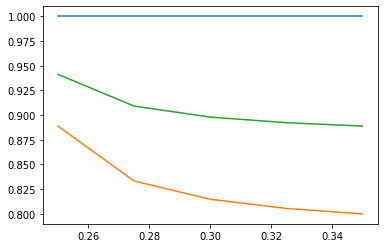

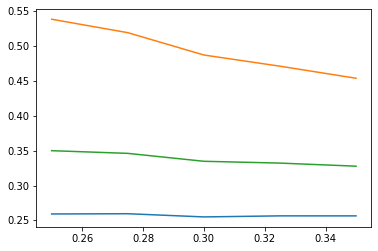

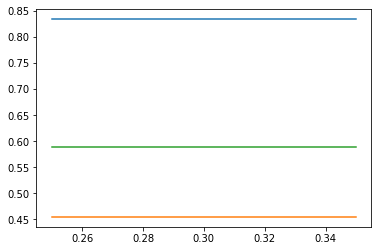

ZeroDivisionError: ignored

In [ ]:
import matplotlib.pyplot as plt

best_threshold=[]
for k in range(11):
  m=0
  best_t=0
  prec_num = 0 
  prec_den = 0
  rec_num = 0
  rec_den = 0 
  threshold = np.linspace(0.25,0.35,5)
  f1 = []
  pre = []
  rec = []
  for t in threshold:
    for seq, mask, y in val_loader:
      bert_model.zero_grad()
      bert_model.eval()
      y_pred = bert_model(seq.to(device), mask.to(device))
      np_out = y_pred.cpu().data.numpy()
      np_act = y.cpu().data.numpy()
      #print(np_out)
    
      for i in range(np_out.shape[0]):
        for j in range(np_out.shape[1]):
        
          if np_out[i][j][k]>=t:
            np_out[i][j][k]=1
          else:
            np_out[i][j][k]=0

      for i in range(np_out.shape[0]):
        for j in range(np_out.shape[1]):
          if np_out[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              prec_num = prec_num + 1
            else:
              prec_den = prec_den + 1
          if np_act[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              rec_num = rec_num + 1
            else:
              rec_den = rec_den + 1

    precision = prec_num/(prec_num+prec_den)
    recall = rec_num/(rec_num+rec_den)
    F1 = 2*precision*recall/(precision+recall)
    f1.append(F1)
    pre.append(precision)
    rec.append(recall)
    if F1>m:
      best_t = t
    m = max(m,F1)
  best_threshold.append(best_t)
  plt.plot(threshold,pre)
  plt.plot(threshold,rec)
  plt.plot(threshold,f1)
  plt.show()
print(best_threshold)

In [ ]:
p=0
n=0
pos=0
neg=0
prec_num = 0 
prec_den = 0
rec_num = 0
rec_den = 0 
p1 = 0
n1=0
for seq, mask, y in val_loader:
    bert_model.zero_grad()
    bert_model.eval()
    y_pred = bert_model(seq.to(device), mask.to(device))
    np_out = y_pred.cpu().data.numpy()
    np_act = y.cpu().data.numpy()
    #print(np_out)
    
    for i in range(np_out.shape[0]):
      for j in range(np_out.shape[1]):
        for k in range(11):
          if np_out[i][j][k]>=0.325:
            np_out[i][j][k]=1
          else:
            np_out[i][j][k]=0

    for i in range(np_out.shape[0]):
      for j in range(np_out.shape[1]):
        if np.max(np_out[i,j,:])==1 or np.max(np_act[i,j,:])==1:
          if np.max(np_out[i,j,:])==1 and np.max(np_act[i,j,:])==1:
            p1 = p1 + 1
          else:
            n1 = n1 + 1

    for i in range(np_out.shape[0]):
      for j in range(np_out.shape[1]):
        for k in range(11):
          if np_out[i,j,k] == np_act[i,j,k]:
            p = p +1
          else:
            n=n+1
          if (np_out[i,j,k])==1 or (np_act[i,j,k])==1:
            if (np_out[i,j,k])==1 and (np_act[i,j,k])==1:
              pos = pos + 1
            else:
              neg = neg + 1
          if np_out[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              prec_num = prec_num + 1
            else:
              prec_den = prec_den + 1
          if np_act[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              rec_num = rec_num + 1
            else:
              rec_den = rec_den + 1

precision = prec_num/(prec_num+prec_den)
recall = rec_num/(rec_num+rec_den)
F1 = 2*precision*recall/(precision+recall)

print("Entity recognition modified accuracy:-" + str(p1/(p1+n1)))
print("--------NER RESULTS--------")
print("Accuracy:-" + str(p/(n+p)))
print("Modified Accuracy:-" + str(pos/(pos+neg)))
print("Precision:-" + str(precision))
print("Recall:-" + str(recall))
print("F1 score:-"+str(F1))

Entity recognition modified accuracy:-0.5490196078431373
--------NER RESULTS--------
Accuracy:-0.9998786546368205
Modified Accuracy:-0.4309623430962343
Precision:-0.5659340659340659
Recall:-0.64375
F1 score:-0.6023391812865497


In [ ]:
torch.save(bert_model,'/content/drive/My Drive/Model/info_60f1_t325.pt')

In [ ]:
bert_model = torch.load('/content/drive/My Drive/Model/subtask2_46f1.pt')

ModuleNotFoundError: ignored